## Import data

In [23]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('synthetic_data_dimension_reduction.csv', index_col=0)

#### Check data types

In [24]:
print(df.shape)
df.dtypes

(100000, 101)


feature_84    float64
feature_55    float64
feature_66    float64
feature_67    float64
feature_45    float64
               ...   
feature_60    float64
feature_71    float64
feature_14     object
feature_92    float64
feature_51    float64
Length: 101, dtype: object

#### Get feature and target

In [25]:
y = df.target
X = df.drop(columns='target')

#### Normalize numerical feature and encode categorical feature

In [26]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

# Numerical features
X_num = X.select_dtypes(include=[float])
X_num.reset_index(inplace=True, drop=True)
X_num = pd.DataFrame(scaler.fit_transform(X_num))

# Categorical features
X_cat = X.select_dtypes(include=[object])
X_cat.reset_index(inplace=True, drop=True)
X_cat = pd.DataFrame(ohe.fit_transform(X_cat))

# Concatenate features
X_final = pd.concat([X_num, X_cat], axis=1)
X_final.reset_index(inplace=True, drop=True)
X_final.set_axis(list(range(X_final.shape[1])), copy=False, axis=1)
print(X_num.shape, X_cat.shape, X_final.shape)

(100000, 85) (100000, 66) (100000, 151)


#### Full dataset takes a long time, so only use 1000 rows

In [27]:
X_final = X_final.iloc[:1000, :]
y = y.iloc[:1000]

## Dimension reduction

In [28]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap

# Define the number of components to reduce to
n_components = 2


#### PCA

In [29]:
print(datetime.datetime.now().time())

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_final)

print(datetime.datetime.now().time())

09:56:22.500620
09:56:22.817973


Variance explained by each component:
Component 1: 9.60% (cumulative: 9.60%)
Component 2: 8.99% (cumulative: 18.59%)
Component 3: 7.18% (cumulative: 25.78%)
Component 4: 4.97% (cumulative: 30.75%)
Component 5: 4.65% (cumulative: 35.40%)
Component 6: 3.92% (cumulative: 39.33%)
Component 7: 3.05% (cumulative: 42.38%)
Component 8: 2.02% (cumulative: 44.40%)
Component 9: 1.69% (cumulative: 46.09%)


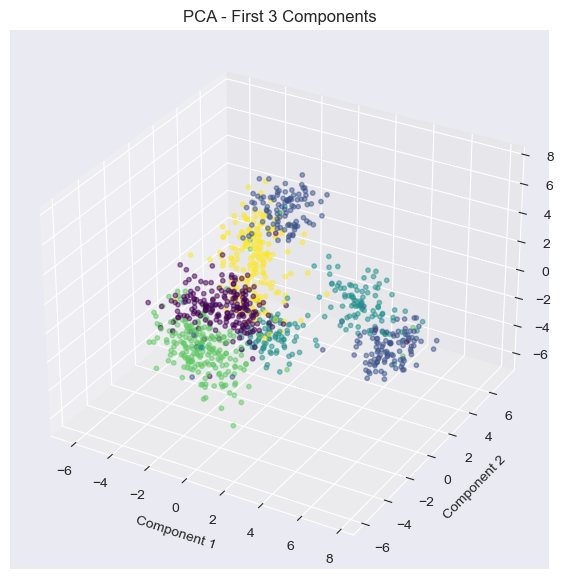

In [30]:

# Display variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print("Variance explained by each component:")
for i, (evr, cev) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance), start=1):
    if i < 10:
        print(f"Component {i}: {evr*100:.2f}% (cumulative: {cev*100:.2f}%)")

# Visualize first three components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x1, y1, z1 = pca_result[:, 0], pca_result[:, 1], pca_result[:, 2]
ax.scatter(x1, y1, z1, c=y, cmap='viridis', s=10, alpha=0.5)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('PCA - First 3 Components')

plt.show()

#### 3D flot is messy, will show again in 2D with results of other methods. The variance explained by the first few components are similar and are not large which suggests that the data is in some sense distributed uniformly.

#### t-SNE

In [31]:
print(datetime.datetime.now().time())
# Perform t-SNE
tsne = TSNE(n_components=n_components, random_state=42)
tsne_result = tsne.fit_transform(X_final)
print(datetime.datetime.now().time())

09:56:49.615920
09:56:51.174469


#### LLE (locally linear embedding)

In [33]:
print(datetime.datetime.now().time())

# Perform LLE
lle = LocallyLinearEmbedding(n_components=n_components, random_state=42)
lle_result = lle.fit_transform(X_final)
print(datetime.datetime.now().time())

09:57:22.330317
09:57:22.396687


#### IsoMAP and UMAP

In [34]:
print(datetime.datetime.now().time())

# Perform Isomap
isomap = Isomap(n_components=n_components)
isomap_result = isomap.fit_transform(X_final)
print(datetime.datetime.now().time())

09:57:47.740558


/Users/ZongyuWu/miniforge3/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 6 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/ZongyuWu/miniforge3/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/ZongyuWu/miniforge3/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/ZongyuWu/miniforge3/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intX

09:57:48.110249


In [35]:
from umap.umap_ import UMAP

print(datetime.datetime.now().time())

# Perform UMAP
umap_result = UMAP(n_components=n_components, random_state=42).fit_transform(X_final)
print(datetime.datetime.now().time())

09:57:49.476691
09:57:51.111061


## Visualization

#### Store data for plotting

In [43]:
# Store the results in a dictionary
pca_result_2d = np.array([pca_result[:, 0], pca_result[:, 1]]).transpose()
results = {
    'PCA': pca_result_2d,
    't-SNE': tsne_result,
    'LLE': lle_result,
    'Isomap': isomap_result,
    'UMAP': umap_result,
}

# Print the results
for method, result in results.items():
    print(f"{method} result shape: {result.shape}")
    print(result[:5, :])  # Print the first 5 rows
    print()

PCA result shape: (1000, 2)
[[-0.41145017 -4.88500475]
 [-0.36072934 -2.52317761]
 [-0.97496897  0.24380285]
 [-0.83040634 -2.60965472]
 [-0.82725589 -1.45581491]]

t-SNE result shape: (1000, 2)
[[ 10.849051  -29.683243 ]
 [ 10.663961  -27.294703 ]
 [-31.880613    1.70697  ]
 [-12.421603  -27.919794 ]
 [  3.310886   -5.9573064]]

LLE result shape: (1000, 2)
[[-4.92664636e-02 -4.27244634e-10]
 [-4.92664636e-02  5.05121426e-10]
 [-4.38606696e-10 -4.25605186e-10]
 [-4.92664642e-02  8.49043007e-11]
 [-4.92664638e-02 -7.35925568e-10]]

Isomap result shape: (1000, 2)
[[ -8.60357992  45.04436199]
 [ -5.851254    38.39937476]
 [-24.91288949  -2.25881366]
 [ 58.8061964    6.12256554]
 [  2.01296147  30.04243755]]

UMAP result shape: (1000, 2)
[[ 1.5274179   0.979059  ]
 [ 1.6554487   0.22918509]
 [14.845347    9.892859  ]
 [-6.0792108  -7.84325   ]
 [14.105202   -1.4998432 ]]



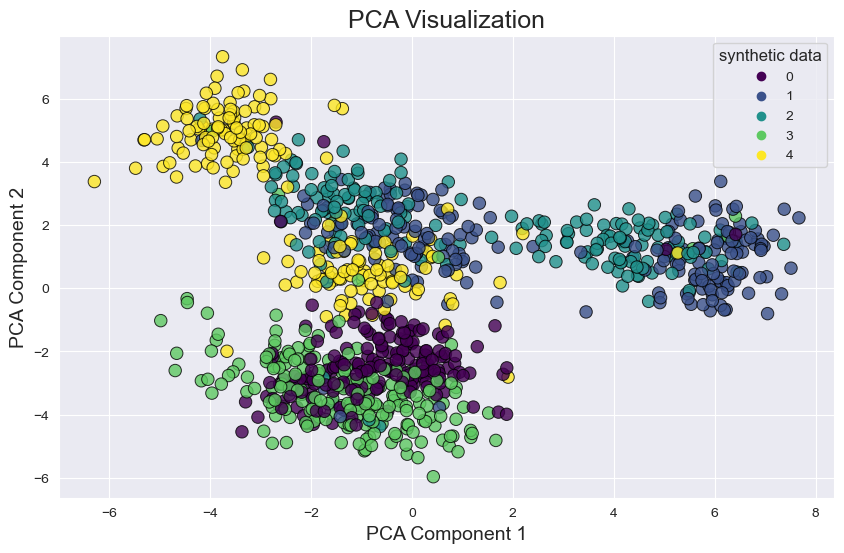

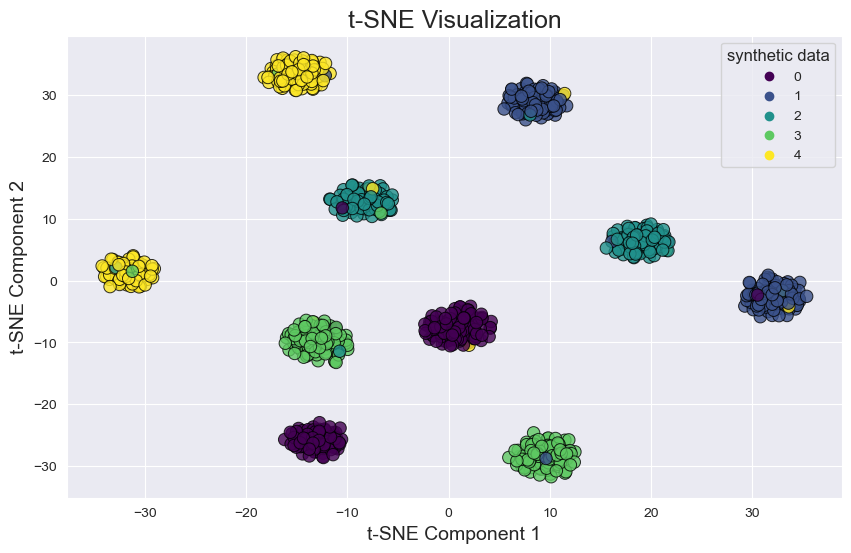

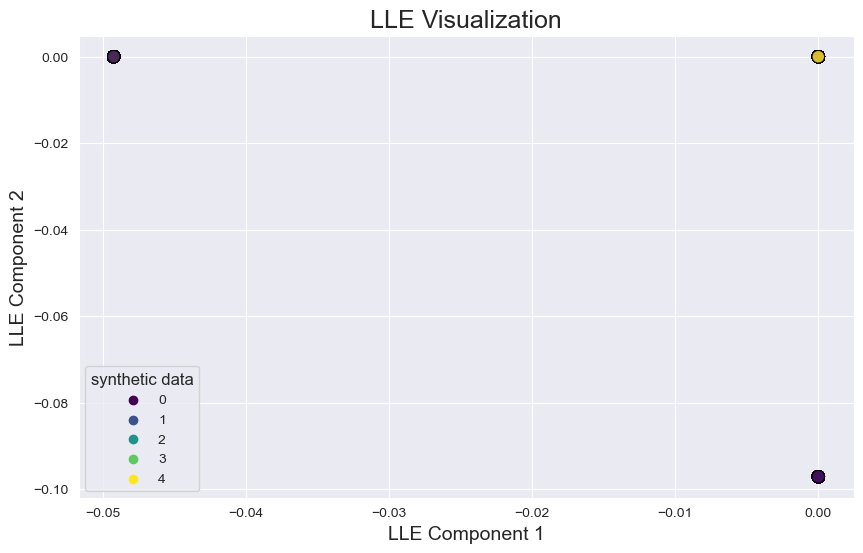

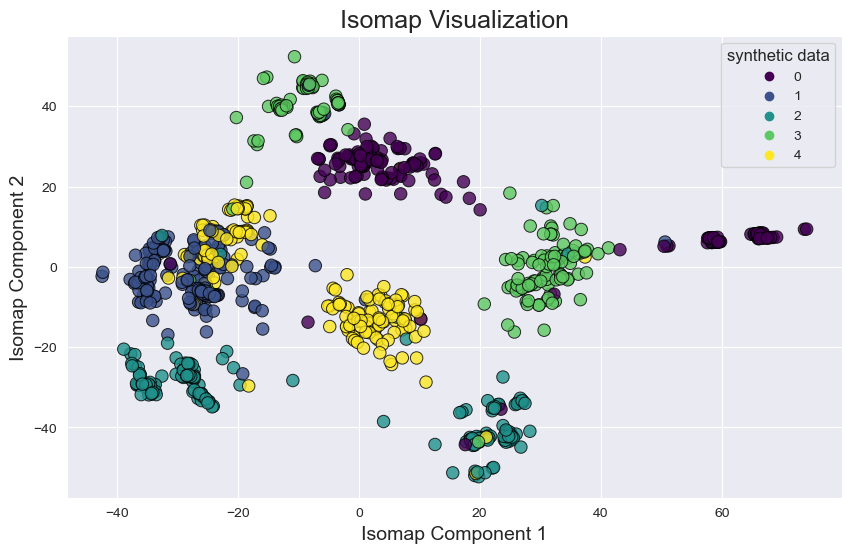

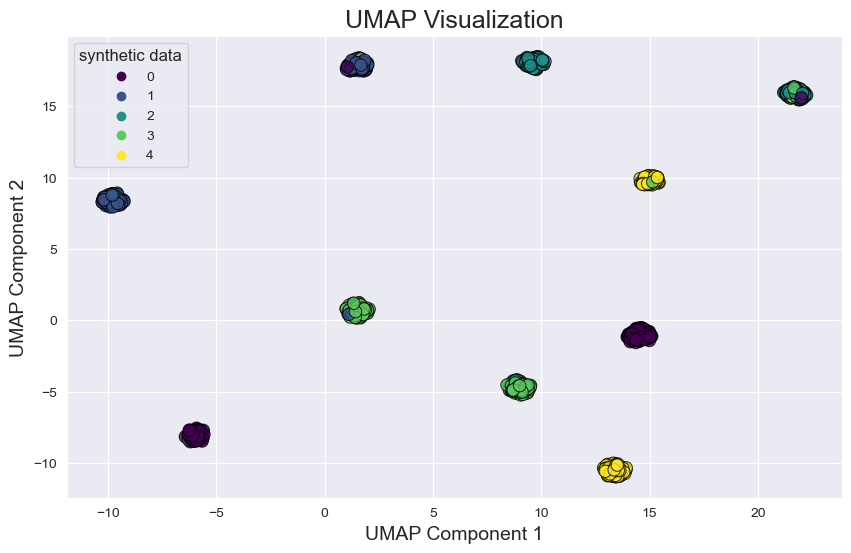

In [44]:
import seaborn as sns
# Visualize t-SNE results
for method in ['PCA', 't-SNE', 'LLE', 'Isomap', 'UMAP']:
    plt.figure(figsize=(10, 6))
    plot_df = pd.DataFrame(results[method], columns=[method + '_1', method + '_2'])
    plot_df['color'] = y

    sns.scatterplot(data=plot_df, x=method + '_1', y=method + '_2', hue='color', palette='viridis', s=80, alpha=0.8, edgecolor='k')
    plt.title(method + ' Visualization', fontsize=18)
    plt.xlabel(method + ' Component 1', fontsize=14)
    plt.ylabel(method + ' Component 2', fontsize=14)
    plt.legend(title='synthetic data', title_fontsize=12, fontsize=10)
    plt.show()

- The 2d plot of pca is still messier than other plots, since the groups intersect each other.
- t-SNE and UMAP looks much better than others, as there are clearly seperated groups.
- LLE is different from other plots. There are three dots on three corners, and the other two classes are hidden under the three groups.
- IsoMAP is similar to PCA, but it's more sparse than PCA. Groups tend to intersect with each other but there are also obvious gaps between them.